In [ ]:
import numpy as np
import pandas as pd
import urllib, json

#This line will have the full data set printed out. 
#Toggle off and clear output if you no longer want to see full dataset
pd.set_option("display.max_rows", None, "display.max_columns", None)




#read in the csv
raw_csv = 'Pumpage_Data_WillCounty.csv'

#Create a copy of the data is not edited
#This will be needed for McKaleigh for 3d
raw_data = pd.read_csv(raw_csv)
print(raw_data)

print('size of original dataframe')
print(raw_data.shape)

#This copy of the data we will edit heavily 
df1 = pd.read_csv(raw_csv)

#drop rows if the depth, lamx, or lamy is unknown
df1.dropna(subset=['depth_total_last_known', 'lam_x', 'lam_y'], inplace = True)
    
#with this line I am dropping all of the rows that are deep wells (>400 ft)
df1.drop(df1[df1['depth_total_last_known'] > 400].index, inplace = True) 

print('size of updated dataframe')
print(df1.shape)

#%%
#df2 provides all of the old data but combined by facility
#reset index to be based on well owner
df2=df1.set_index('owner')
#delete extra rows so that the dataframe will just be owner and the years of pumping
df2=df2.drop(['p_num', 'isws_facility_id', 'fac_well_num','depth_total_last_known', 'lam_x', 'lam_y'], axis=1)
#sum together all pumping for the same well owners so that the dataset is by pumping by facility
df2=df2.groupby(level=0).sum(min_count=1)

#calculate the maximum pumping for each facility
df2['max']=df2[['1981', '1982', '1983',
       '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991', '1992',
       '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001',
       '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010',
       '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019']].max(axis=1) 
#remove all facilities with nan in max and where maximum well pumping is less than 0.1mgd / "small fry" wells
df3=df2.dropna(subset=['max'],axis=0)
df3['small']=df3['max']-36524250
df4=df3[df3.small > 0]
df4=df4.drop(['small', 'max'], axis=1)
#%%
#for index, row in df4.iterrows():
    #ave = df4.mean(axis=1)
    #df4['ave']=df4.index.map(ave)
    #data_1981=df4[df4.1981 > df.ave, axis = 0]
    
#df4[!rowSums(df4[-1] > df4['ave']),]
    #for year, pumpage in df4.iteritems():
#df4['1981']=np.where((df4['1981'] >= df4['ave']*2), np.nan)
#if df4['1981'] > df4['ave']*2:
    #df4['1981'] = nan
        #print('Year:',year)
        #print('Pumpage:', pumpage)
#print(df4)

#df3=df3[df3.max() > 36524250]
#df3=df3.drop(df3[df3['max'] < 36524250].index, inplace=True)
#df['ave']=df.mean(axis=0)
#print('ave')

#%%
#Here I am taking out the more recent years
subset = df4[['2013', '2014', '2015', '2016', '2017', '2018', '2019']]

#Here I dropping the orignal recent years from the dataframe
modify3 = df4.drop(['2013', '2014', '2015', '2016', '2017', '2018', '2019'], axis='columns')


#To bridge the more recent data, I'm doing a forward fill, back fill, and subbing in 0s
subset.fillna(method='ffill', axis='columns', inplace=True, limit=3, downcast=None)
subset.fillna(method='bfill', axis='columns', inplace=True, limit=3, downcast=None)
subset.fillna(value = 0, axis=1, inplace=True)


#This is replacing my updated recent years and forming a new dataframe
df5 = pd.concat([modify3, subset], axis = 1)

#This will fill into for up to two years of lapsed reporting data, the rest NaNs become 0
df5 = df5.fillna(method='ffill', axis='columns', limit=1)
df5 = df5.fillna(method='bfill', axis='columns', limit=1)
df5 = df5.fillna(0)

In [1]:
#import pcks
import numpy as np
import pandas as pd
import urllib, json

In [2]:
#This line will have the full data set printed out. 
#Toggle off and clear output if you no longer want to see full dataset
pd.set_option("display.max_rows", None, "display.max_columns", None)

#read in the csv
raw_csv = 'Pumpage_Data_WillCounty.csv'

In [3]:
#Create a copy of the data is not edited
#This will be needed for McK for 3d
raw_data = pd.read_csv(raw_csv)
print(raw_data)

print('size of original dataframe')
print(raw_data.shape)

      p_num  isws_facility_id  \
0    152530        19713228.0   
1    152562        19713228.0   
2    158221        19714241.0   
3    223202        19714241.0   
4    224255        19714515.0   
5    224256        19714515.0   
6    292193        19713940.0   
7    304771        19713228.0   
8    338236        19770000.0   
9    345572        19713330.0   
10   359321        19795400.0   
11   382164        19770000.0   
12   400038        19790450.0   
13   400177        19790550.0   
14   400178        19790650.0   
15   400180               NaN   
16   400181        19790450.0   
17   400182        19790900.0   
18   400183        19790250.0   
19   400184        19790250.0   
20   400185        19790250.0   
21   400186        19790500.0   
22   400187        19790500.0   
23   400188        19790800.0   
24   400189        19790800.0   
25   400190        19794150.0   
26   401404         4314862.0   
27   401405         4314862.0   
28   401500         4316928.0   
29   40162

In [38]:
#raw_data_2 provides all of the old data but combined by facility
#reset index to be based on well owner
raw_data_2=raw_data.set_index('owner')
#delete extra rows so that the dataframe will just be owner and the years of pumping
raw_data_2=raw_data_2.drop(['p_num','isws_facility_id', 'fac_well_num','depth_total_last_known', 'lam_x', 'lam_y'], axis=1)
#sum together all pumping for the same well owners so that the dataset is by pumping by facility
raw_data_2=raw_data_2.groupby(level=0).sum(min_count=1)

#calculate the maximum pumping for each facility
raw_data_2['max']=raw_data_2[['1981', '1982', '1983',
       '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991', '1992',
       '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001',
       '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010',
       '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019']].max(axis=1) 
#remove all facilities with nan in max and where maximum well pumping is less than 0.1mgd / "small fry" wells
raw_data_3=raw_data_2.dropna(subset=['max'],axis=0)
raw_data_3['small']=raw_data_3['max']-36524250
raw_data_4=raw_data_3[raw_data_3.small > 0]
raw_data_4=raw_data_4.drop(['small', 'max'], axis=1)

raw_data_4

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


1981          1982  \
owner                                                                           
AQUA ILLINOIS - OAKVIEW                            7.859520e+06  9.028800e+06   
AQUA ILLINOIS - UNIVERSITY PARK                    3.173460e+08  2.754480e+08   
AQUA ILLINOIS - WILLOWBROOK UTILITIES              3.976914e+07  4.697200e+07   
BEECHER                                            7.755900e+07  7.845280e+07   
BOLINGBROOK                                        1.800090e+08  2.164300e+08   
BONNIE BRAE - FOREST MANOR SAN DIST                5.604700e+07  5.356400e+07   
BRAIDWOOD                                          1.187000e+08  1.305100e+08   
BROKEN ARROW GOLF COURSE                                    NaN           NaN   
CATERPILLAR INC - JOLIET                           1.564361e+08  2.387044e+08   
CENTERPOINT JOLIET TERMINAL RAILROAD, LLC          5.728440e+07  6.962180e+07   
CENTRAL SOD FARMS - WILL CTY                                NaN           NaN   
CHANNAHON                                          2.750000e+06  2.730000e+06   
CITGO PETROLEUM CORPORATION                        4.784300e+07  6.393000e+07   
CLEARVIEW SUBD                                     9.125000e+06  1.260000e+07   
CONTINENTAL/MIDLAND                                2.031809e+07  2.031809e+07   
CREST HILL                                         3.591029e+08  2.927235e+08   
CRETE                                              1.696642e+08  1.337513e+08   
CRETE-MONEE HIGH SCHOOL                            1.095000e+06  0.000000e+00   
CRYSTAL LAWNS ADDITION IMPROVEMENT ASSOC.          4.636000e+07  3.482784e+07   
DEER CREEK GOLF COURSE                                      NaN           NaN   
DESOTO LLC                                         1.825000e+06  4.680722e+07   
DIAMOND                                                     NaN           NaN   
EASTMORELAND WATER SERVICE ASSN - LENOX            5.621000e+07  1.530000e+07   
ELWOOD                                             1.263570e+08  1.279522e+08   
EVERGREEN SOD FARM                                          NaN           NaN   
EXELON - BRAIDWOOD STATION                         7.534512e+06  4.800000e+06   
EXXON MOBIL OIL CORP - JOLIET REFINERY             2.500000e+07  2.600000e+07   
FLINT HILLS RESOURCES CHEMICAL INTERMEDIATES, LLC  5.314000e+08  4.777380e+08   
FRANKFORT                                          2.215299e+08  2.258090e+08   
GERDAU AMERISTEEL - JOLIET MILL                    3.787670e+07  2.818260e+07   
GREEN GARDEN GOLF COURSE                                    NaN           NaN   
HANSON MATERIAL SERVICE - YARD 61                  8.200000e+06  1.049000e+07   
ILLINOIS AMERICAN - ARBURY HILLS DIV               5.976200e+07  5.683500e+07   
ILLINOIS AMERICAN - SANTA FE DIVISION              0.000000e+00  1.847000e+06   
ILLINOIS AMERICAN - WEST SUBURBAN DIV              9.192090e+08  8.479750e+08   
IVEX JOLIET                                        1.840000e+08  2.768600e+07   
JOHNS MANVILLE INTERNATIONAL I                     1.104906e+08  7.881640e+07   
JOLIET                                             4.373671e+09  4.644468e+09   
JOLIET CORRECTIONAL CENTER                         9.599982e+07  9.239700e+07   
JOLIET REGION PORT DIS AIRPORT                     4.750000e+07  4.677420e+07   
KEATING RESOURCES                                  2.636371e+08  2.689203e+08   
LINCOLNSHIRE COUNTRY CLUB                          5.490000e+07  0.000000e+00   
LOCKPORT                                           4.386385e+08  4.227575e+08   
LOCKPORT TWP WATER SYSTEM                                   NaN           NaN   
LODERS CROKLAAN                                    1.800000e+08  1.600000e+08   
MANHATTAN                                          5.956800e+07  6.748600e+07   
MIDEWIN NATIONAL TALLGRASS PRAIRIE - USDA FS       7.222100e+07  8.854690e+07   
MIDWEST GENERATION - JOLIET ST 29 UNITS 7-8        5.655000e+08  7.369350e+08   
MIDWEST G

In [49]:
raw_data_t=raw_data_4.T
raw_data_t

owner  AQUA ILLINOIS - OAKVIEW  AQUA ILLINOIS - UNIVERSITY PARK  \
1981                 7859520.0                      317346000.0   
1982                 9028800.0                      275448000.0   
1983                 8127360.0                      408200000.0   
1984                 9346320.0                      477940000.0   
1985                 9752400.0                      524605000.0   
1986                10666800.0                      448840000.0   
1987                 9781200.0                      394930000.0   
1988                10256400.0                      432915000.0   
1989                10771200.0                      438498000.0   
1990                10580400.0                      437255160.0   
1991                 9979200.0                      548306000.0   
1992                 9979200.0                      502707000.0   
1993                 9991000.0                      477444240.0   
1994                10000000.0                      371308000.0   
1995                 9990000.0                      381057000.0   
1996                10000000.0                      373982000.0   
1997                10000000.0                              NaN   
1998                14905494.0                              NaN   
1999                14066000.0                      395598528.0   
2000                16828500.0                      413547870.0   
2001                17012944.0                      425038537.0   
2002               172400000.0                      478103454.0   
2003                21427000.0                      448495200.0   
2004                12281600.0                      512769000.0   
2005                       NaN                      518289000.0   
2006                       NaN                      520836470.0   
2007                       NaN                      563704212.0   
2008                       NaN                      490975457.0   
2009                       NaN                      478813285.0   
2010                       NaN                      481148508.0   
2011                       NaN                      461296608.0   
2012                       NaN                      441212474.0   
2013                       NaN                      414322633.0   
2014                       NaN                      375323768.0   
2015                       NaN                      377731800.0   
2016                       NaN                      475951000.0   
2017                       NaN                      412815000.0   
2018                       NaN                              NaN   
2019                       NaN                              NaN   

owner  AQUA ILLINOIS - WILLOWBROOK UTILITIES      BEECHER  BOLINGBROOK  \
1981                              39769139.0   77559000.0  180009000.0   
1982                              46972000.0   78452800.0  216430000.0   
1983                              54782000.0   86787700.0  174777000.0   
1984                              50216000.0   88348300.0  121962530.0   
1985                              59382000.0   88348300.0  180802000.0   
1986                              63045000.0  108619200.0   75674000.0   
1987                              60885000.0  100292100.0  242358000.0   
1988                              93242000.0  102760900.0  131292000.0   
1989                              77686000.0   93518000.0   92943000.0   
1990                              74061000.0   96203500.0   16357000.0   
1991                              76891000.0   98154800.0  161093000.0   
1992                              79064000.0   99767100.0  120547000.0   
1993                              71927000.0   85077000.0   80010000.0   
1994                              85725000.0  115745000.0  202744000.0   
1995                              80622000.0   84228000.0  233498000.0   
1996                               8784700.0   85101000.0  234440000.0   
1997                                     NaN   95820000.0  23

array([<matplotlib.axes._subplots.AxesSubplot object at 0x142f53a90>,
      dtype=object)

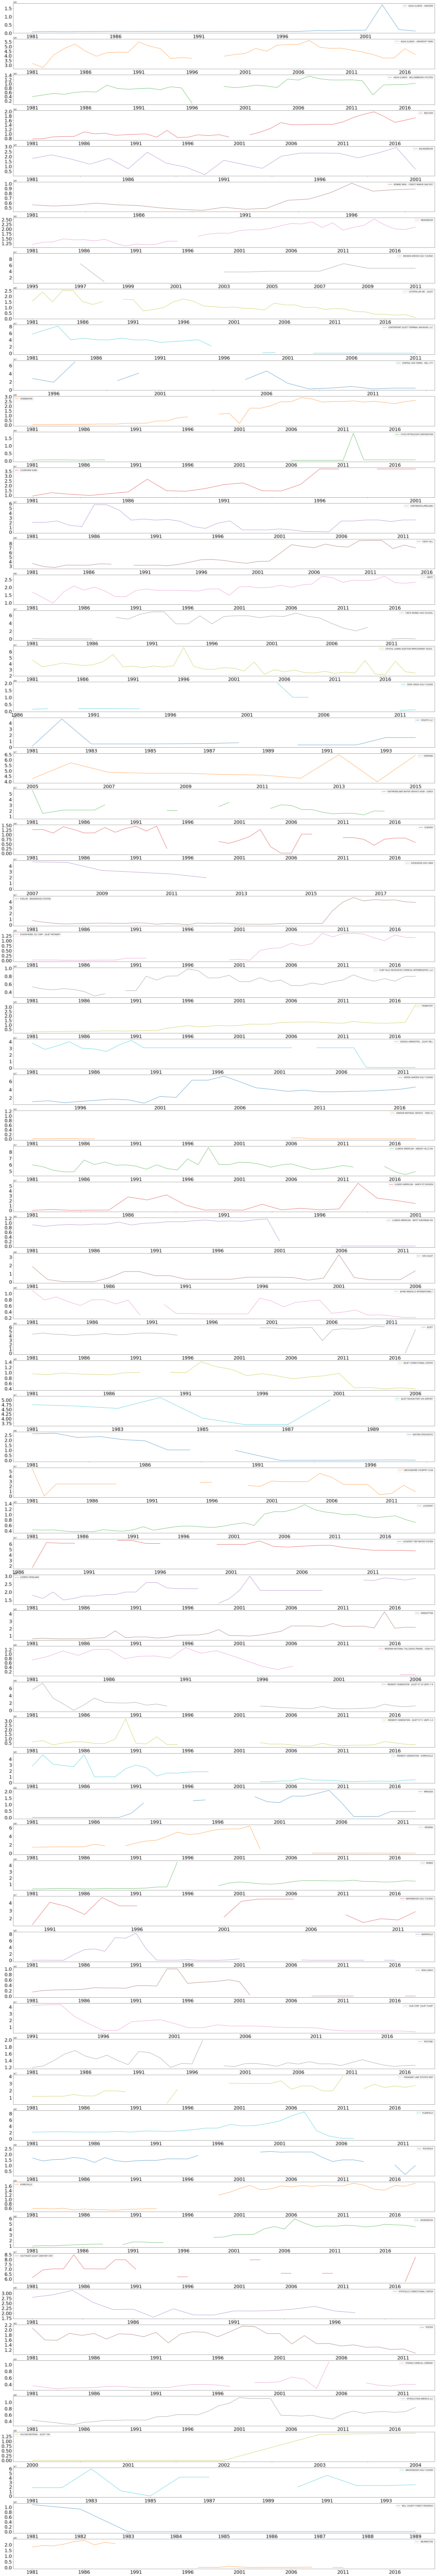

In [82]:
raw_data_t.plot(label='owner', subplots=True, figsize=(40,250), fontsize=25, sharex=False)

In [83]:
#filtering this data to just the main facilities:
raw_data_df=raw_data_t[['CREST HILL', 'JOLIET', 'LOCKPORT', 'ROMEOVILLE']]
raw_data_df

owner   CREST HILL        JOLIET      LOCKPORT    ROMEOVILLE
1981   359102900.0  4.373671e+09  4.386385e+08  5.785450e+08
1982   292723500.0  4.644468e+09  4.227575e+08  5.910310e+08
1983   272187800.0  4.391169e+09  4.361479e+08  5.657500e+08
1984   325009500.0  4.304210e+09  3.968740e+08  5.948730e+08
1985   322505000.0  4.060773e+09  3.660000e+08  5.227080e+08
1986   321564300.0  4.242751e+09  3.700000e+08  5.611850e+08
1987   353132350.0  4.279192e+09  3.666617e+08  5.371460e+08
1988   344871500.0  4.525326e+09  4.436743e+08  5.331460e+08
1989           NaN  4.288070e+09  4.061515e+08  5.038840e+08
1990   320623200.0  4.292293e+09  3.852146e+08  5.421730e+08
1991   320623200.0  4.570978e+09  4.358679e+08  5.564360e+08
1992   324824000.0  4.644105e+09  5.512710e+08  5.743580e+08
1993   311530000.0  4.591124e+09  4.214180e+08  5.743580e+08
1994   341156000.0  4.450110e+09  4.821780e+08           NaN
1995   391366200.0  4.139337e+09  5.414620e+08           NaN
1996   443621500.0           NaN  5.758860e+08           NaN
1997   448054500.0           NaN  5.690730e+08           NaN
1998   426979800.0           NaN  5.382400e+08           NaN
1999   388887100.0           NaN  5.235342e+08  1.199515e+09
2000   364569000.0  4.322024e+09  5.765830e+08  1.310990e+09
2001   404249000.0           NaN  6.427180e+08  1.487835e+09
2002   409018800.0           NaN  6.932310e+08  1.633888e+09
2003   588206100.0  5.836047e+09  5.975440e+08  1.434493e+09
2004   774608000.0  5.836047e+09  1.012875e+09  1.467485e+09
2005   736035000.0  5.714025e+09  1.103671e+09  1.610427e+09
2006   706919358.0  5.779168e+09  1.103671e+09  1.556168e+09
2007   786621000.0  5.906636e+09  1.192779e+09  1.624210e+09
2008   739079000.0  5.906636e+09  1.358193e+09  1.585086e+09
2009   719751000.0  2.909964e+09  1.175074e+09  1.631745e+09
2010   861734000.0  5.400502e+09  1.091733e+09  1.612947e+09
2011   868017000.0  5.629247e+09  1.049893e+09  1.605692e+09
2012   868017000.0  5.549028e+09  9.871510e+08  1.725984e+09
2013   688131000.0  5.707350e+09  1.006198e+09  1.643927e+09
2014   765734000.0  6.240287e+09  9.185304e+08  1.456671e+09
2015   705877000.0  6.060041e+09  8.826460e+08  1.414389e+09
2016           NaN           NaN  9.149822e+08  1.620330e+09
2017           NaN  5.353318e+06  9.514690e+08  1.592895e+09
2018           NaN  5.476856e+09  8.142289e+08  1.727376e+09
2019           NaN           NaN  7.043957e+08           NaN

array([<matplotlib.axes._subplots.AxesSubplot object at 0x12a1a28d0>,
      dtype=object)

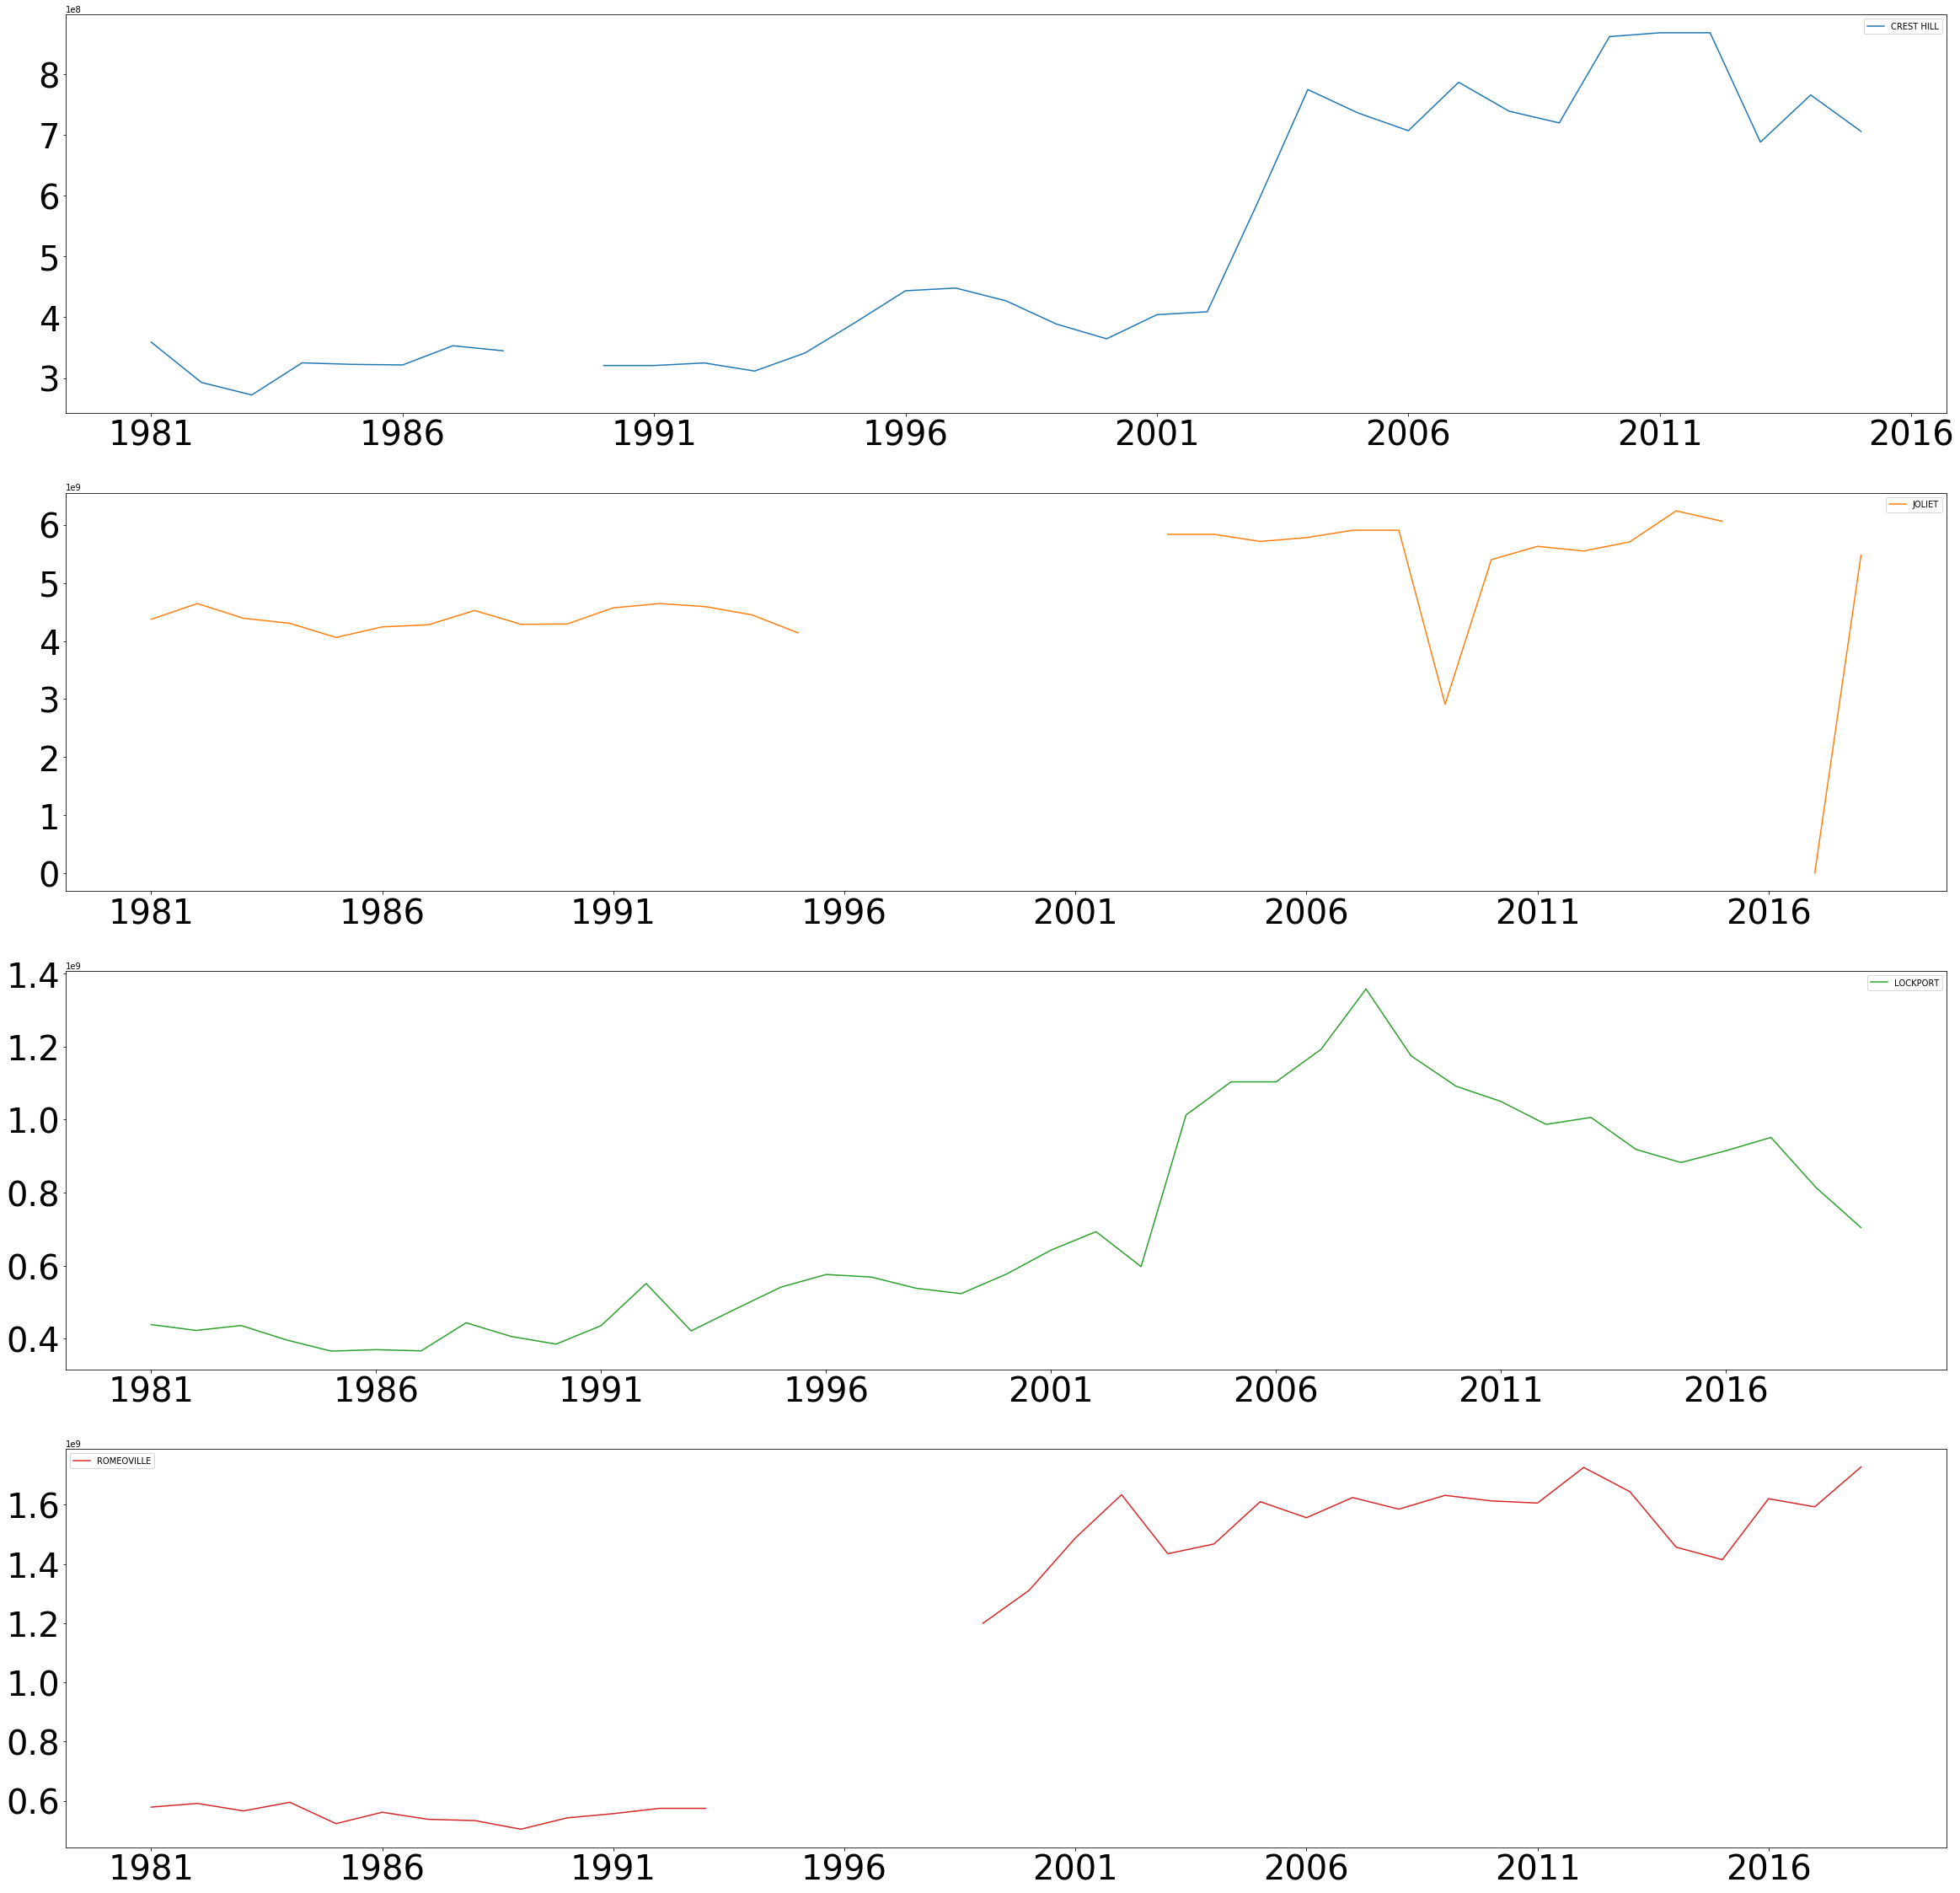

In [84]:
#plotting these main facilities
raw_data_df.plot(label='owner', subplots=True, figsize=(40,40), fontsize=40, sharex=False)

In [4]:
#This copy of the data we will edit heavily 
df1 = pd.read_csv(raw_csv)

#drop rows if the depth, lamx, or lamy is unknown
df1.dropna(subset=['depth_total_last_known', 'lam_x', 'lam_y'], inplace = True)
    
#with this line I am dropping all of the rows that are deep wells (>400 ft)
df1.drop(df1[df1['depth_total_last_known'] > 400].index, inplace = True) 

print('size of updated dataframe')
print(df1.shape)

size of updated dataframe
(336, 46)


In [40]:
#%%
#df2 provides all of the old data but combined by facility
#reset index to be based on well owner
df2=df1.set_index('owner')
#delete extra rows so that the dataframe will just be owner and the years of pumping
df2=df2.drop(['p_num','isws_facility_id', 'fac_well_num','depth_total_last_known', 'lam_x', 'lam_y'], axis=1)
#sum together all pumping for the same well owners so that the dataset is by pumping by facility
df2=df2.groupby(level=0).sum(min_count=1)

#calculate the maximum pumping for each facility
df2['max']=df2[['1981', '1982', '1983',
       '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991', '1992',
       '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001',
       '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010',
       '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019']].max(axis=1) 
#remove all facilities with nan in max and where maximum well pumping is less than 0.1mgd / "small fry" wells
df3=df2.dropna(subset=['max'],axis=0)
df3['small']=df3['max']-36524250
df4=df3[df3.small > 0]
df4=df4.drop(['small', 'max'], axis=1)
#%%
#for index, row in df4.iterrows():
    #ave = df4.mean(axis=1)
    #df4['ave']=df4.index.map(ave)
    #data_1981=df4[df4.1981 > df.ave, axis = 0]
    
#df4[!rowSums(df4[-1] > df4['ave']),]
    #for year, pumpage in df4.iteritems():
#df4['1981']=np.where((df4['1981'] >= df4['ave']*2), np.nan)
#if df4['1981'] > df4['ave']*2:
    #df4['1981'] = nan
        #print('Year:',year)
        #print('Pumpage:', pumpage)
#print(df4)

#df3=df3[df3.max() > 36524250]
#df3=df3.drop(df3[df3['max'] < 36524250].index, inplace=True)
#df['ave']=df.mean(axis=0)
#print('ave')

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [41]:
#%%
#Here I am taking out the more recent years
subset = df4[['2013', '2014', '2015', '2016', '2017', '2018', '2019']]

#Here I dropping the orignal recent years from the dataframe
modify3 = df4.drop(['2013', '2014', '2015', '2016', '2017', '2018', '2019'], axis='columns')


#To bridge the more recent data, I'm doing a forward fill, back fill, and subbing in 0s
subset.fillna(method='ffill', axis='columns', inplace=True, limit=3, downcast=None)
subset.fillna(method='bfill', axis='columns', inplace=True, limit=3, downcast=None)
subset.fillna(value = 0, axis=1, inplace=True)


#This is replacing my updated recent years and forming a new dataframe
df5 = pd.concat([modify3, subset], axis = 1)

#This will fill into for up to two years of lapsed reporting data, the rest NaNs become 0
df5 = df5.fillna(method='ffill', axis='columns', limit=1)
df5 = df5.fillna(method='bfill', axis='columns', limit=1)
df5 = df5.fillna(0)

df5

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4153: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


1981          1982  \
owner                                                                  
AQUA ILLINOIS - OAKVIEW                      7859520.0  9.028800e+06   
BEECHER                                     77559000.0  7.845280e+07   
BOLINGBROOK                                180009000.0  2.164300e+08   
BONNIE BRAE - FOREST MANOR SAN DIST         56047000.0  5.356400e+07   
BROKEN ARROW GOLF COURSE                           0.0  0.000000e+00   
CENTRAL SOD FARMS - WILL CTY                       0.0  0.000000e+00   
CLEARVIEW SUBD                               9125000.0  1.260000e+07   
CREST HILL                                 359102900.0  2.927235e+08   
CRETE                                      169664200.0  1.202365e+08   
CRETE-MONEE HIGH SCHOOL                      1095000.0  0.000000e+00   
CRYSTAL LAWNS ADDITION IMPROVEMENT ASSOC.   46360000.0  3.482784e+07   
DEER CREEK GOLF COURSE                             0.0  0.000000e+00   
DESOTO LLC                                   1825000.0  4.680722e+07   
ELWOOD                                      25915000.0  2.678100e+07   
EVERGREEN SOD FARM                                 0.0  0.000000e+00   
FRANKFORT                                  115798000.0  8.662830e+07   
HANSON MATERIAL SERVICE - YARD 61            8200000.0  1.049000e+07   
ILLINOIS AMERICAN - SANTA FE DIVISION              0.0  1.847000e+06   
ILLINOIS AMERICAN - WEST SUBURBAN DIV      919209000.0  8.479750e+08   
JOLIET                                     806580000.0  1.157596e+09   
JOLIET REGION PORT DIS AIRPORT               9500000.0  2.686600e+06   
LOCKPORT                                    46657900.0  2.733550e+07   
LOCKPORT TWP WATER SYSTEM                          0.0  0.000000e+00   
MANHATTAN                                   59568000.0  6.748600e+07   
MINOOKA                                            0.0  0.000000e+00   
MOKENA                                      67824600.0  6.435400e+07   
NAPERVILLE                                         0.0  0.000000e+00   
NEW LENOX                                  148510600.0  2.026548e+08   
PEOTONE                                    119920000.0  1.237100e+08   
PHEASANT LAKE ESTATES MHP                   11753000.0  1.175300e+07   
ROCKDALE                                           0.0  0.000000e+00   
ROMEOVILLE                                 157714600.0  3.365835e+08   
SHOREWOOD                                   84764800.0  1.002000e+08   
SOUTHEAST JOLIET SANITARY DIST              61221000.0  6.913200e+07   
STEGER                                     207911200.0  1.598670e+08   
VULCAN MATERIAL - JOLIET 340                       0.0  0.000000e+00   
WEDGEWOOD GOLF COURSE                       18300000.0  1.830000e+07   
WILL COUNTY FOREST PRESERVE                110000000.0  9.200000e+07   

                                                  1983         1984  \
owner                                                                 
AQUA ILLINOIS - OAKVIEW                      8127360.0    9346320.0   
BEECHER                                     86787700.0   88348300.0   
BOLINGBROOK                                174777000.0  121962530.0   
BONNIE BRAE - FOREST MANOR SAN DIST         55388000.0   59540000.0   
BROKEN ARROW GOLF COURSE                           0.0          0.0   
CENTRAL SOD FARMS - WILL CTY                       0.0          0.0   
CLEARVIEW SUBD                              10950000.0    9760000.0   
CREST HILL                                 272187800.0  325009500.0   
CRETE                                       88003500.0  156691000.0   
CRETE-MONEE HIGH SCHOOL                            0.0          0.0   
CRYSTAL LAWNS ADDITION IMPROVEMENT ASSOC.   37638400.0   41125790.0   
DEER CREEK GOLF COURSE                             0.0          0.0   
DESOTO LLC                                   5353900.0    5353900.0   
ELWOOD                                      26780200.0   36090100.0   
EVERGREEN SOD FARM               

In [7]:
#swap rows and columns
df_modified_t=df5.T
df_modified_t

owner  AQUA ILLINOIS - OAKVIEW      BEECHER  BOLINGBROOK  \
1981                 7859520.0   77559000.0  180009000.0   
1982                 9028800.0   78452800.0  216430000.0   
1983                 8127360.0   86787700.0  174777000.0   
1984                 9346320.0   88348300.0  121962530.0   
1985                 9752400.0   88348300.0  180802000.0   
1986                10666800.0  108619200.0   75674000.0   
1987                 9781200.0  100292100.0  242358000.0   
1988                10256400.0   97818900.0  131292000.0   
1989                10771200.0   61099000.0   92943000.0   
1990                10580400.0   49194700.0   16357000.0   
1991                 9979200.0   46280800.0  161093000.0   
1992                 9979200.0   32362100.0  120547000.0   
1993                 9991000.0   32362100.0   80010000.0   
1994                10000000.0          0.0  202744000.0   
1995                 9990000.0          0.0  233498000.0   
1996                10000000.0          0.0  234440000.0   
1997                10000000.0          0.0  232534000.0   
1998                14905494.0          0.0  186172000.0   
1999                14066000.0          0.0  233056000.0   
2000                16828500.0          0.0  290051000.0   
2001                17012944.0          0.0   69716000.0   
2002               172400000.0          0.0   69716000.0   
2003                21427000.0          0.0          0.0   
2004                12281600.0          0.0          0.0   
2005                12281600.0          0.0          0.0   
2006                       0.0          0.0          0.0   
2007                       0.0          0.0          0.0   
2008                       0.0          0.0          0.0   
2009                       0.0          0.0          0.0   
2010                       0.0          0.0          0.0   
2011                       0.0          0.0          0.0   
2012                       0.0          0.0          0.0   
2013                       0.0          0.0          0.0   
2014                       0.0          0.0          0.0   
2015                       0.0          0.0          0.0   
2016                       0.0          0.0          0.0   
2017                       0.0          0.0          0.0   
2018                       0.0          0.0          0.0   
2019                       0.0          0.0          0.0   

owner  BONNIE BRAE - FOREST MANOR SAN DIST  BROKEN ARROW GOLF COURSE  \
1981                            56047000.0                       0.0   
1982                            53564000.0                       0.0   
1983                            55388000.0                       0.0   
1984                            59540000.0                       0.0   
1985                            56067000.0                       0.0   
1986                            54569000.0                       0.0   
1987                            49810000.0                       0.0   
1988                            46580000.0                       0.0   
1989                            44660000.0                       0.0   
1990                            51033000.0                       0.0   
1991                            46840000.0                       0.0   
1992                            48887000.0                       0.0   
1993                            65486000.0                       0.0   
1994                            68012000.0                94202000.0   
1995                            81048000.0                94202000.0   
1996                           100664000.0                94202000.0   
1997                            84309000.0                65000000.0   
1998                            87399000.0                 6000000.0   
1999                            88940000.0                 6000000.0   
2000                            88940000.0                       0.0   
2001                                   0.0                       0.0   
2002           

array([<matplotlib.axes._subplots.AxesSubplot object at 0x1410c82d0>,
      dtype=object)

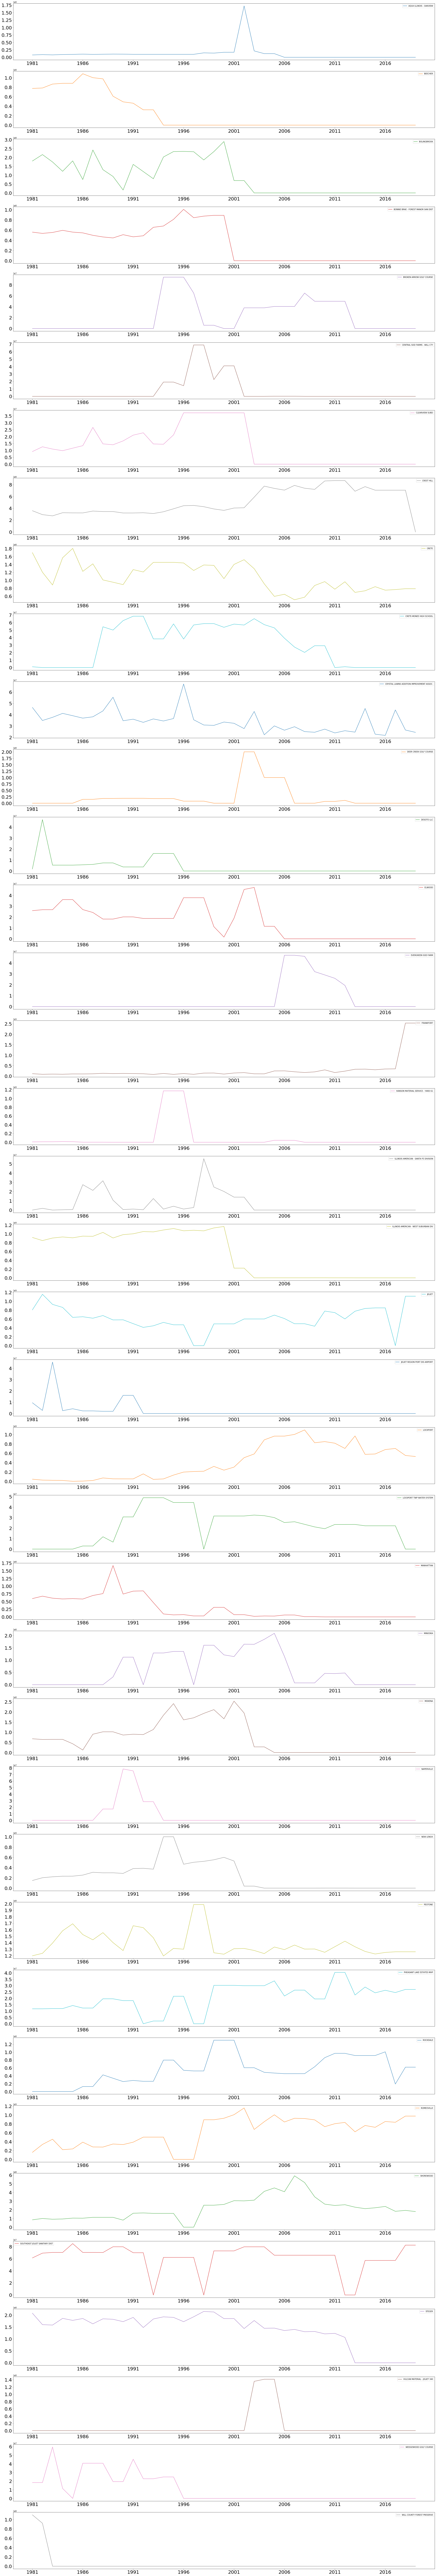

In [81]:
#plotting the modified dataframe for facility totals:
df_modified_t.plot(label='owner', subplots=True, figsize=(40,250), fontsize=25, sharex=False)

In [68]:
#Filtering out the data even more
#selecting the main facilities for our group:
df_modified=df_modified_t[['CREST HILL', 'JOLIET', 'LOCKPORT', 'ROMEOVILLE']]
df_modified



owner   CREST HILL        JOLIET      LOCKPORT    ROMEOVILLE
1981   359102900.0  8.065800e+08  4.665790e+07  1.577146e+08
1982   292723500.0  1.157596e+09  2.733550e+07  3.365835e+08
1983   272187800.0  9.302700e+08  2.269210e+07  4.541790e+08
1984   325009500.0  8.622300e+08  1.985103e+07  2.180120e+08
1985   322505000.0  6.373880e+08  2.000000e+06  2.357290e+08
1986   321564300.0  6.519260e+08  6.000000e+06  3.881400e+08
1987   353132350.0  6.185450e+08  1.902120e+07  2.796640e+08
1988   344871500.0  6.784800e+08  7.316090e+07  2.776640e+08
1989   344871500.0  5.798130e+08  5.460150e+07  3.466740e+08
1990   320623200.0  5.825440e+08  5.326450e+07  3.336955e+08
1991   320623200.0  4.962590e+08  5.289790e+07  3.879525e+08
1992   324824000.0  4.118710e+08  1.602310e+08  5.015530e+08
1993   311530000.0  4.476970e+08  4.291800e+07  5.015530e+08
1994   341156000.0  5.244700e+08  5.249800e+07  5.015530e+08
1995   391366200.0  4.701250e+08  1.344520e+08  0.000000e+00
1996   443621500.0  4.701250e+08  1.986100e+08  0.000000e+00
1997   448054500.0  0.000000e+00  2.105040e+08  0.000000e+00
1998   426979800.0  0.000000e+00  2.167970e+08  8.928475e+08
1999   388887100.0  4.908736e+08  3.199386e+08  8.928475e+08
2000   364569000.0  4.908736e+08  2.395010e+08  9.276215e+08
2001   404249000.0  4.908736e+08  3.047540e+08  1.007482e+09
2002   409018800.0  6.014237e+08  5.058490e+08  1.158591e+09
2003   588206100.0  6.014237e+08  5.855930e+08  6.745076e+08
2004   774608000.0  6.014237e+08  8.862656e+08  8.498596e+08
2005   736035000.0  6.890880e+08  9.666180e+08  1.005462e+09
2006   706919358.0  6.113700e+08  9.666180e+08  8.429380e+08
2007   786621000.0  4.941030e+08  1.002444e+09  9.267756e+08
2008   739079000.0  4.941030e+08  1.098888e+09  9.208957e+08
2009   719751000.0  4.381480e+08  8.246730e+08  8.906550e+08
2010   861734000.0  7.795100e+08  8.491960e+08  7.376696e+08
2011   868017000.0  7.447590e+08  8.151660e+08  8.042600e+08
2012   868017000.0  6.023220e+08  7.033520e+08  8.334546e+08
2013   688131000.0  7.757870e+08  9.699038e+08  6.215893e+08
2014   765734000.0  8.381820e+08  5.772394e+08  7.643490e+08
2015   705877000.0  8.510330e+08  5.848880e+08  7.230200e+08
2016   705877000.0  8.510330e+08  6.792062e+08  8.542560e+08
2017   705877000.0  9.946680e+05  7.028180e+08  8.364590e+08
2018   705877000.0  1.114247e+09  5.530919e+08  9.763688e+08
2019           0.0  1.114247e+09  5.310657e+08  9.763688e+08

array([<matplotlib.axes._subplots.AxesSubplot object at 0x13dfd0610>,
      dtype=object)

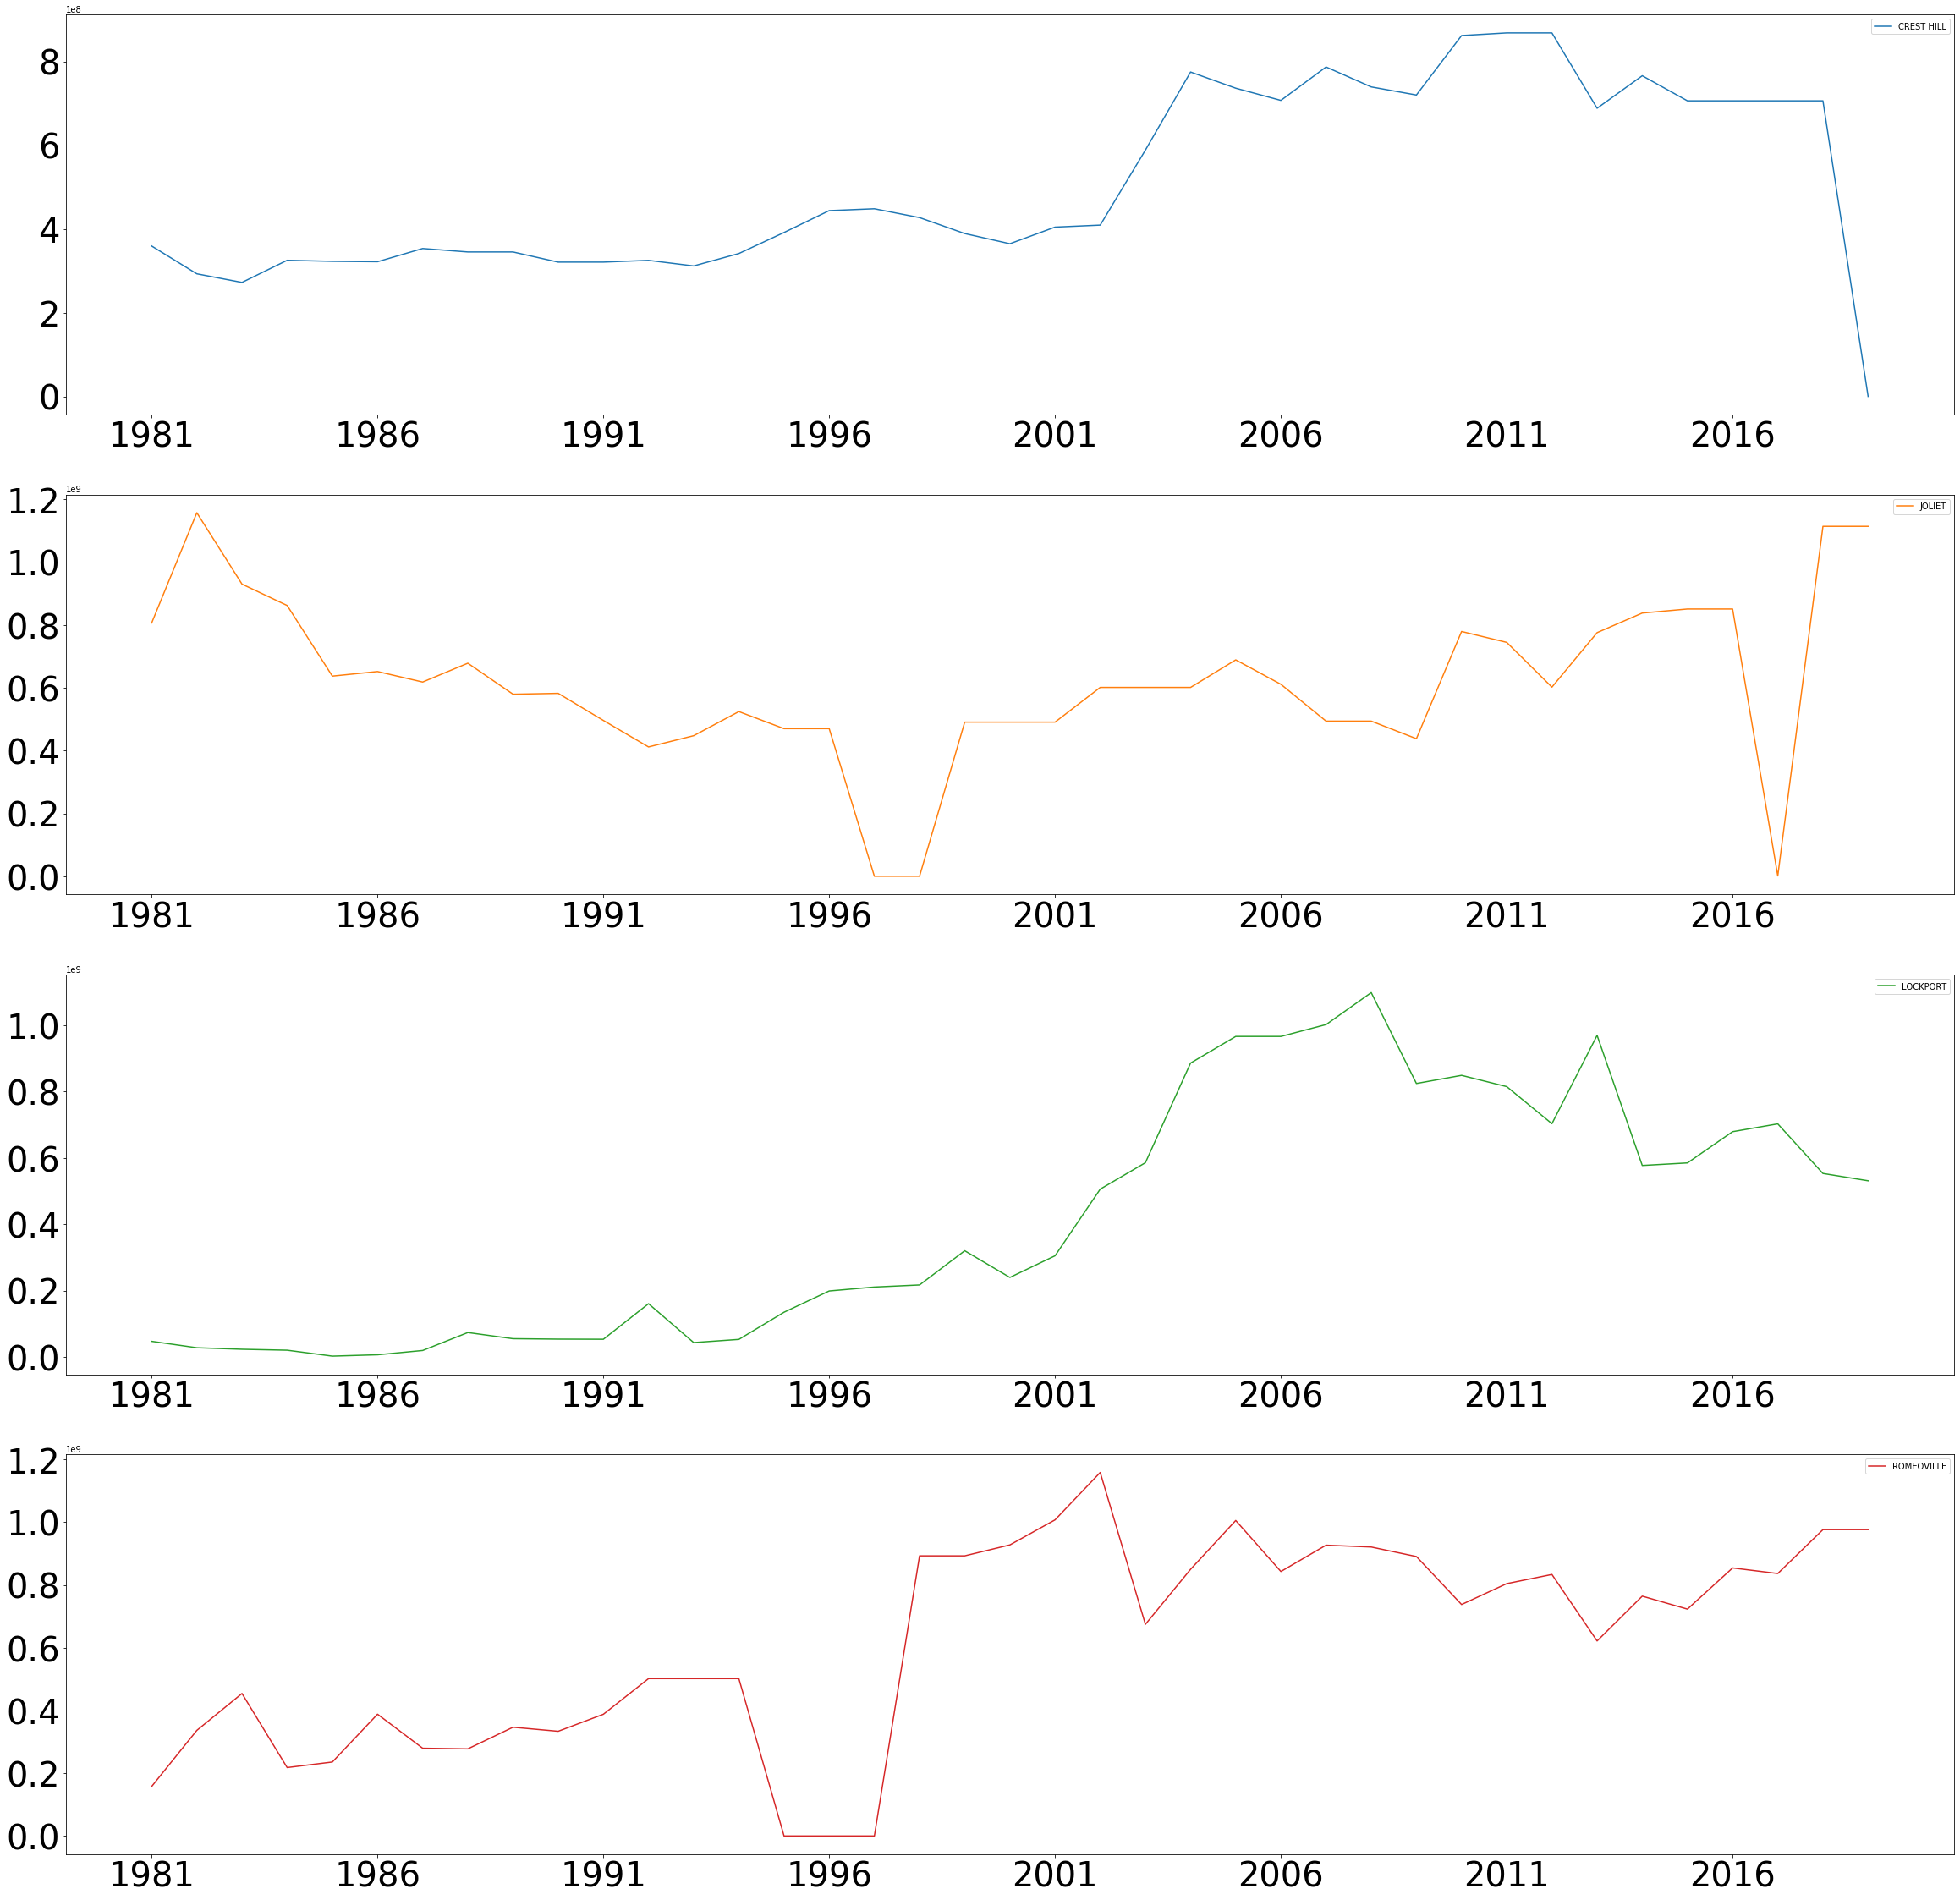

In [80]:
df_modified.plot(label='owner', subplots=True, figsize=(40,40), fontsize=40, sharex=False)